
# Post - Surgical Complication Prediction
### Problem Statement 
**Develop a machine learning model that utilizes patient demographic data and medical history to accurately predict the risk of postoperative complications.**



### Importing Libraries

In [1]:
# Data preprocessing and manipulation
import pandas                as pd
import numpy                 as np

# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.gridspec as gridspec
%matplotlib inline

# Converting non numeric value to numeric
from sklearn.preprocessing  import LabelEncoder

# Train test split
from sklearn.model_selection import train_test_split

# Model Building and evaluation
from sklearn.linear_model        import LogisticRegression
from sklearn.tree                import DecisionTreeClassifier
from sklearn.ensemble            import RandomForestClassifier
from sklearn.metrics             import confusion_matrix , recall_score , accuracy_score , precision_score , f1_score , classification_report

# Hyperparamer Tunning
from sklearn.model_selection import GridSearchCV

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Data
df = pd.read_csv(r"D:\Data Science\Imarticus Learning\Capstone Project 1\Postoperative_complication.csv")

In [3]:
# Making copy of the data
df_copy = df.copy(deep=True)

In [4]:
df.head(6)

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,Yes,0,No,No,No,No,No,...,-0.57,Thursday,Female,7.63,July,First Quarter,No,-0.43,1,No
1,18.73,59.1,0,No,0,No,No,No,No,No,...,0.21,Monday,Female,12.93,January,First Quarter,No,-0.41,1,No
2,21.85,59.0,0,No,0,No,No,No,No,No,...,0.00,Wednesday,Female,7.68,June,Third Quarter,No,0.08,1,No
3,18.49,59.0,1,No,1,No,No,Yes,Yes,No,...,-0.65,Wednesday,Male,7.58,May,Third Quarter,No,-0.32,1,No
4,19.70,59.0,1,No,0,No,No,No,No,No,...,0.00,Monday,Female,7.88,December,New Moon,No,0.00,1,No
5,20.24,59.0,0,Yes,0,No,No,No,No,No,...,0.00,Tuesday,Female,7.63,January,Third Quarter,No,0.15,1,No


In [5]:
df.shape

(14635, 25)

* There are 14635 rows and 25 columns in the dataset.
* The first 24 columns represent the features and the last column represent the target/label.

## Exploratory Data Analysis
* Exploratory Data Analysis or EDA, is an important step to be performed in Data Science projects. 
* EDA is generally the process of visualising datasets to find out different patterns in the datasets, analyzing the anomalies behaviour of the datasets and building assumptions or hypothesis based on the understanding of the data

In [6]:
# for descriptive statistics of the data 
df.describe()

,bmi,Age,asa_status,baseline_charlson,ahrq_ccs,ccsComplicationRate,ccsMort30Rate,complication_rsi,hour,mortality_rsi,race
count,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000
mean,31.295642,63.205268,0.632320,0.977520,7.428493,0.133570,0.004447,-0.699044,10.171613,-0.836712,0.919440
std,8.152709,18.088191,0.539952,1.758355,6.949455,0.088402,0.004579,1.339394,2.659881,1.194111,0.364663
min,2.150000,6.100000,0.000000,0.000000,0.000000,0.016118,0.000000,-4.720000,6.070000,-3.820000,0.000000
25%,26.510000,51.500000,0.000000,0.000000,0.000000,0.081977,0.001962,-1.970000,7.820000,-2.250000,1.000000
50%,28.980000,59.700000,1.000000,0.000000,6.000000,0.105720,0.002959,-0.580000,9.120000,-0.640000,1.000000
75%,35.295000,74.700000,1.000000,2.000000,13.000000,0.183370,0.007398,0.000000,12.050000,0.000000,1.000000
max,92.590000,90.000000,2.000000,13.000000,21.000000,0.466129,0.016673,12.560000,18.920000,4.400000,2.000000


### Missing Value Analysis

In [7]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

There are no missing values available in the data 

### Duplicate Values

In [8]:
df.duplicated().value_counts()

False    11733
True      2902
Name: count, dtype: int64

* There are 2902 dupilicate records present in the data.

In [9]:
df = df.drop_duplicates()
df.shape

(11733, 25)

* Duplicate values are removed from the data to ensure accuracy and avoid skewing results by eliminating redundant information.

### Checking Datatype of all variables

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11733 entries, 0 to 14634
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bmi                  11733 non-null  float64
 1   Age                  11733 non-null  float64
 2   asa_status           11733 non-null  int64  
 3   baseline_cancer      11733 non-null  object 
 4   baseline_charlson    11733 non-null  int64  
 5   baseline_cvd         11733 non-null  object 
 6   baseline_dementia    11733 non-null  object 
 7   baseline_diabetes    11733 non-null  object 
 8   baseline_digestive   11733 non-null  object 
 9   baseline_osteoart    11733 non-null  object 
 10  baseline_psych       11733 non-null  object 
 11  baseline_pulmonary   11733 non-null  object 
 12  ahrq_ccs             11733 non-null  int64  
 13  ccsComplicationRate  11733 non-null  float64
 14  ccsMort30Rate        11733 non-null  float64
 15  complication_rsi     11733 non-null  floa

### Let's see how many Object type features are actually Categorical

In [11]:
df.select_dtypes('object').apply(pd.Series.nunique , axis = 0)

baseline_cancer        2
baseline_cvd           2
baseline_dementia      2
baseline_diabetes      2
baseline_digestive     2
baseline_osteoart      2
baseline_psych         2
baseline_pulmonary     2
dow                    5
gender                 2
month                 12
moonphase              4
mort30                 2
complication           2
dtype: int64

### Variables which are continuous

In [12]:
Continuous_Variables  = []
for var in df.columns[:]:
    if (df[var].dtypes == 'int64') | (df[var].dtypes == 'float64'):
        Continuous_Variables.append(var)
Continuous_Variables        

['bmi',
 'Age',
 'asa_status',
 'baseline_charlson',
 'ahrq_ccs',
 'ccsComplicationRate',
 'ccsMort30Rate',
 'complication_rsi',
 'hour',
 'mortality_rsi',
 'race']

### Box Plot

<AxesSubplot:>

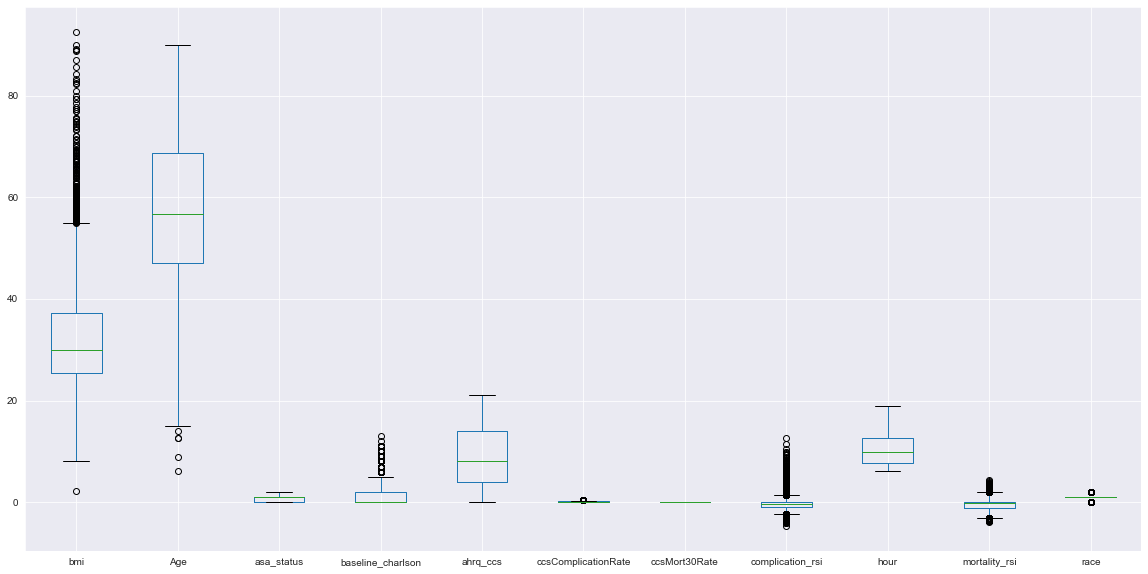

In [13]:
plt.figure(figsize=(20 , 10))
df.boxplot()

### Univariate Analysis

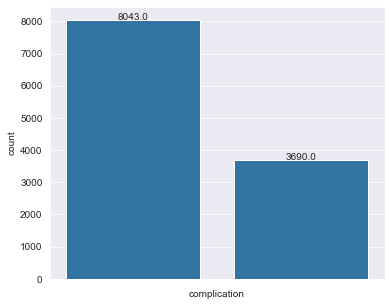

In [14]:
fig, ax1 = plt.subplots(figsize=(6,5))
graph = sns.countplot(ax=ax1,x='complication', data=df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

Text(0.5, 1.0, 'Pie Chart')

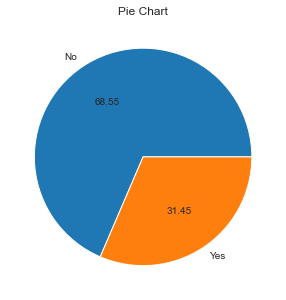

In [15]:
# Pie Chart
plt.figure(figsize=(7 , 5))
df.groupby(df.complication).size().plot(kind = 'pie' , autopct = '%.2f' )
plt.title("Pie Chart")

* In the dataset, 66.55% data corresponds to patients who did not experience postoperative complications (class 0), while a smaller portion (31.45%) represents patients who did have postoperative complications (class 1).
* This indicates that there is an imbalance in the dataset, with class 0 being more dominant than the other.

Text(0.5, 1.0, 'Pie Chart')

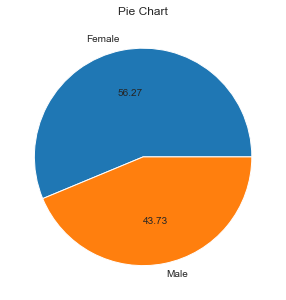

In [16]:
# Pie Chart
plt.figure(figsize=(8, 5) )
df.groupby(df.gender).size().plot(kind = 'pie' , autopct = '%.2f')
plt.title("Pie Chart")

* Female patients are more than male patients in the dataset.

<AxesSubplot:xlabel='count', ylabel='mort30'>

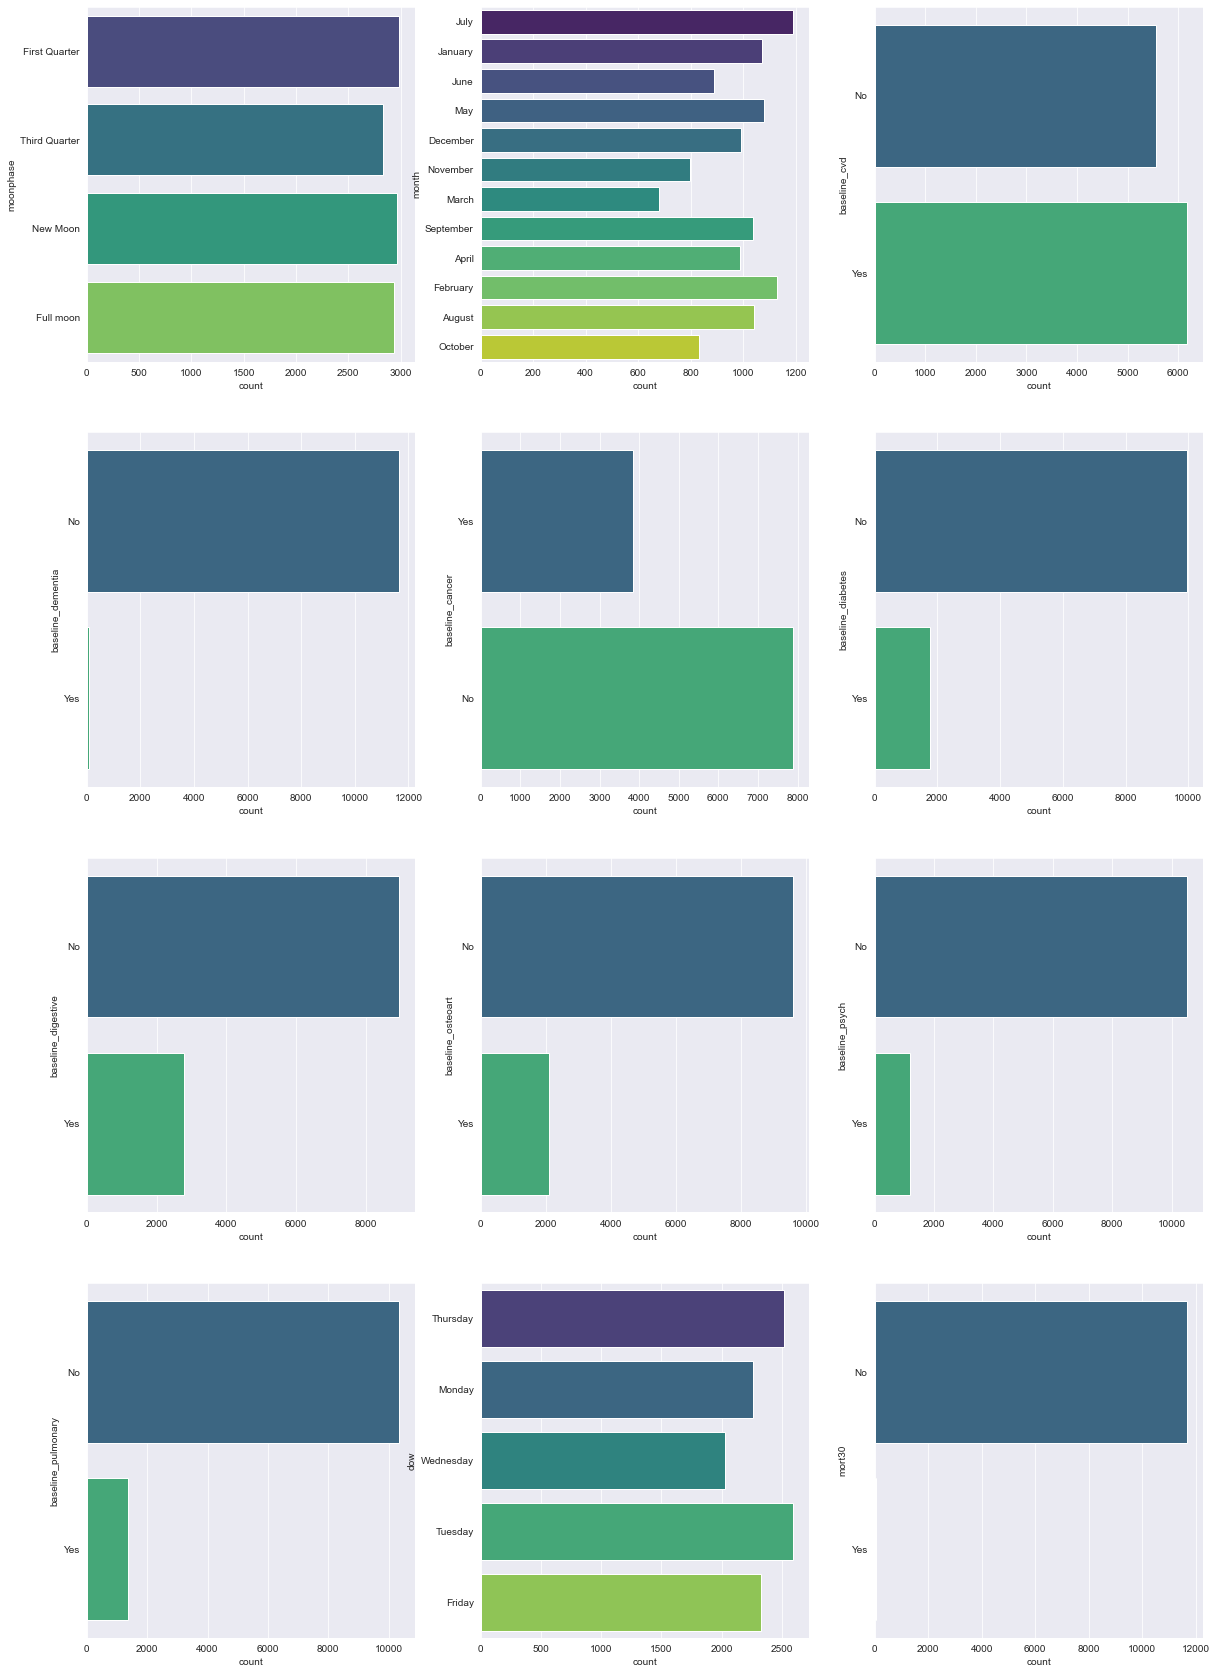

In [17]:
fig , axes = plt.subplots(4, 3,figsize = (20 , 30) )
sns.countplot(df.moonphase , ax = axes[0 , 0] , palette='viridis' )
sns.countplot(df.month ,ax = axes[0 , 1] ,palette='viridis')
sns.countplot(df.baseline_cvd , ax = axes[0 , 2] ,palette='viridis')
sns.countplot(df.baseline_dementia , ax = axes[1, 0] ,palette='viridis')
sns.countplot(df.baseline_cancer , ax = axes[1 , 1] ,palette='viridis')
sns.countplot(df.baseline_diabetes , ax = axes[1 , 2] , palette='viridis')
sns.countplot(df.baseline_digestive , ax  = axes[2, 0] ,palette='viridis')
sns.countplot(df.baseline_osteoart , ax = axes[2 , 1] ,palette='viridis')
sns.countplot(df.baseline_psych , ax = axes[2 , 2 ] ,palette='viridis')
sns.countplot(df.baseline_pulmonary , ax = axes[3 , 0] , palette='viridis')
sns.countplot(df.dow , ax = axes[3 , 1] , palette='viridis')
sns.countplot(df.mort30 , ax = axes[3 , 2] , palette='viridis')

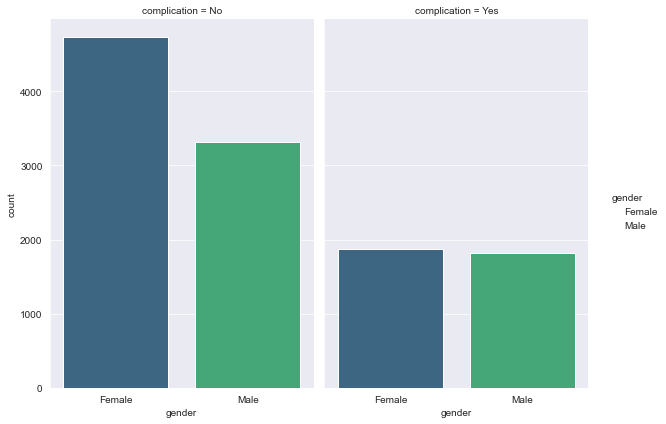

In [18]:
sns.catplot(x="gender",col="complication",data=df, kind="count",height=6, aspect=.7 , palette='viridis')

* The plot above indicates that there is an equal number of male and female patients experiencing post-surgical complications.

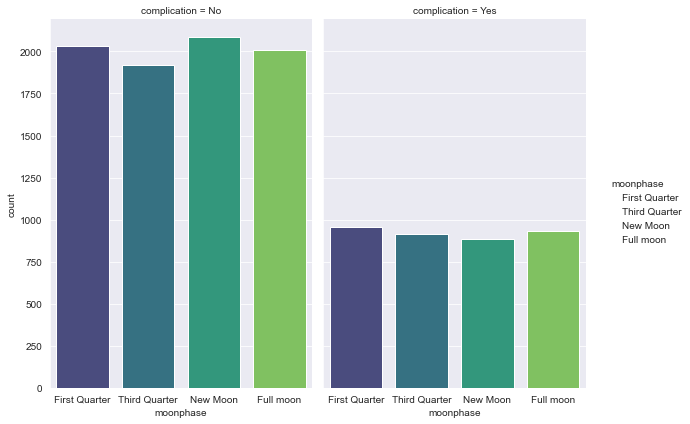

In [19]:
sns.catplot(x="moonphase",col="complication",data=df, kind="count",height=6, aspect=.7 , palette='viridis')

* The bar graph indicates he number of patients experiencing complications postoperatively is same for all four moon phases.

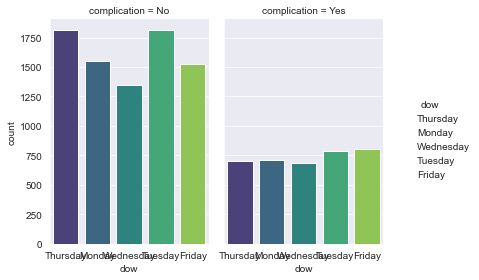

In [20]:
sns.catplot(x="dow",col="complication",data=df, kind="count",height=4, aspect=.7 , palette='viridis')

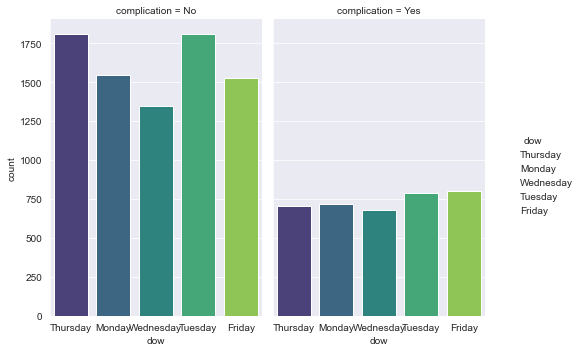

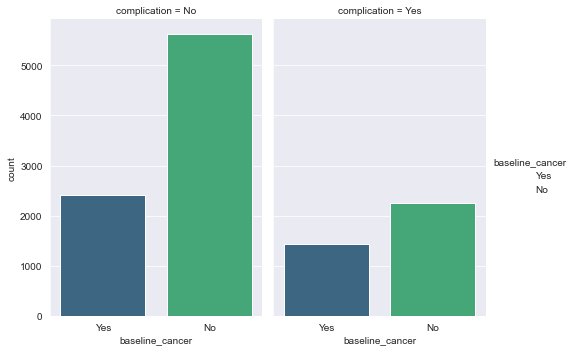

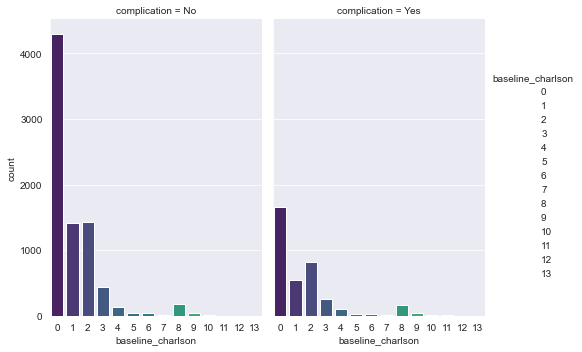

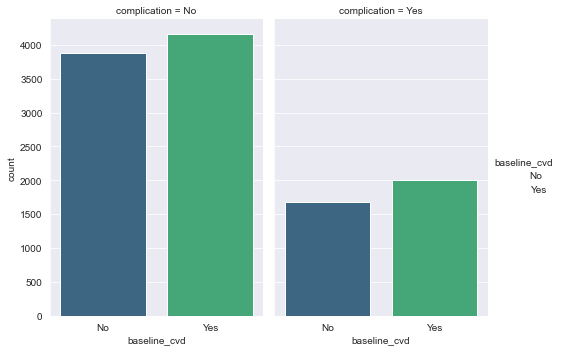

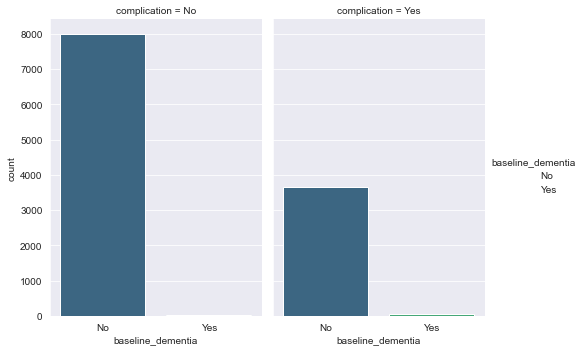

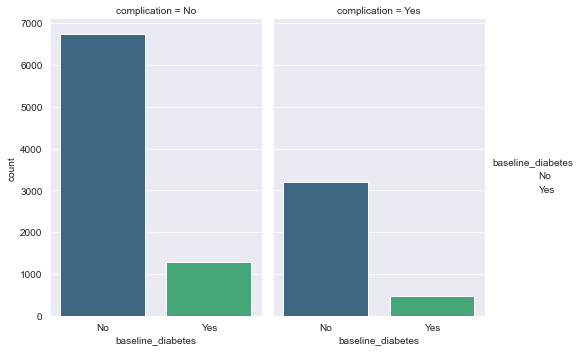

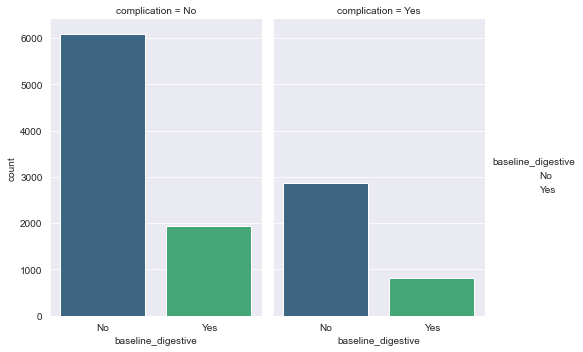

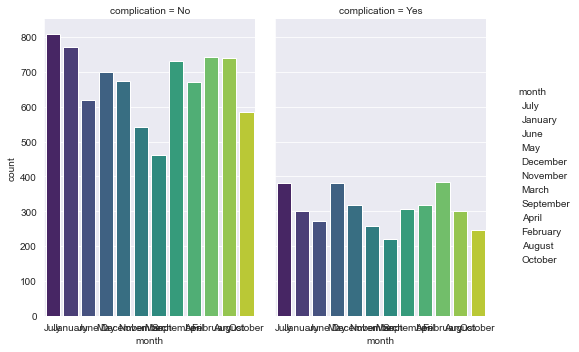

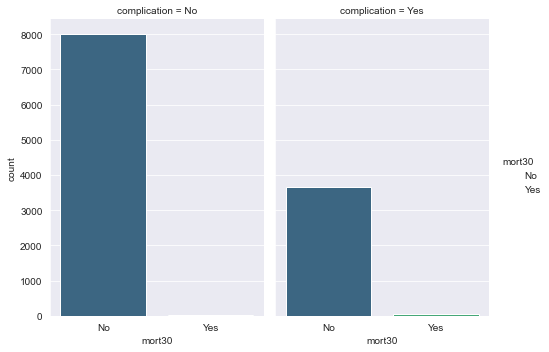

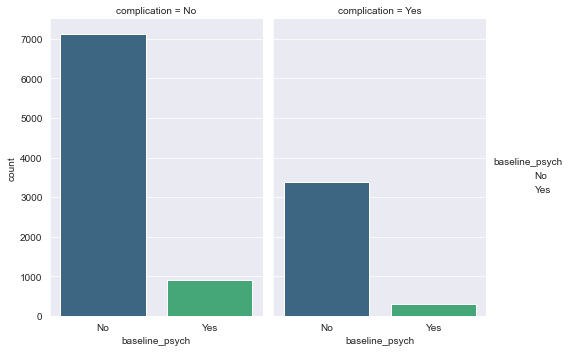

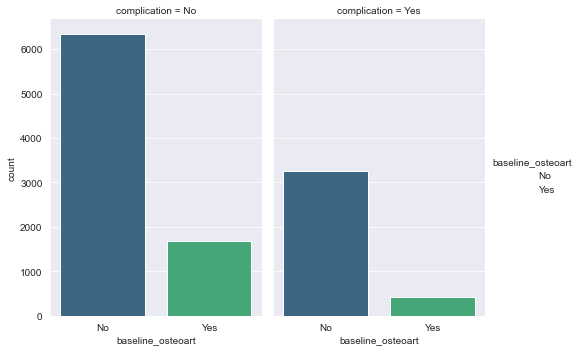

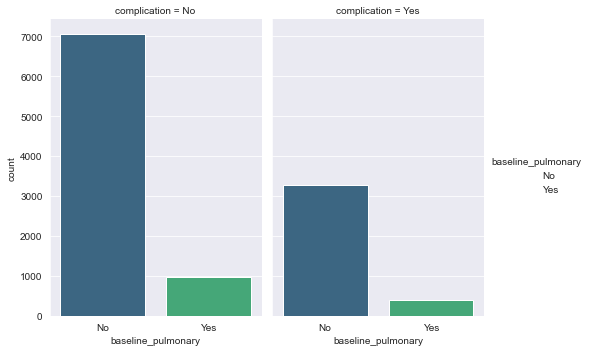

In [21]:
sns.catplot(x="dow",col="complication",data=df, kind="count",height=5, aspect=.7 , palette='viridis' )
sns.catplot(x='baseline_cancer',col="complication",data=df, kind="count",height=5, aspect=.7 , palette='viridis' )
sns.catplot(x='baseline_charlson',col="complication",data=df, kind="count",height=5, aspect=.7 , palette='viridis')
sns.catplot(x='baseline_cvd',col="complication",data=df, kind="count",height=5, aspect=.7 , palette='viridis')
sns.catplot(x='baseline_dementia',col="complication",data=df, kind="count",height=5, aspect=.7 , palette='viridis' )
sns.catplot(x='baseline_diabetes',col="complication",data=df, kind="count",height=5, aspect=.7 , palette='viridis')
sns.catplot(x='baseline_digestive',col="complication",data=df, kind="count",height=5, aspect=.7 , palette='viridis')
sns.catplot(x='month',col="complication",data=df, kind="count",height=5, aspect=.7 , palette='viridis' )
sns.catplot(x='mort30',col="complication",data=df, kind="count",height=5, aspect=.7 , palette='viridis' )
sns.catplot(x='baseline_psych',col="complication",data=df, kind="count",height=5, aspect=.7 , palette='viridis')
sns.catplot(x='baseline_osteoart',col="complication",data=df, kind="count",height=5, aspect=.7 , palette='viridis' )
sns.catplot(x='baseline_pulmonary',col="complication",data=df, kind="count",height=5, aspect=.7 , palette='viridis' )


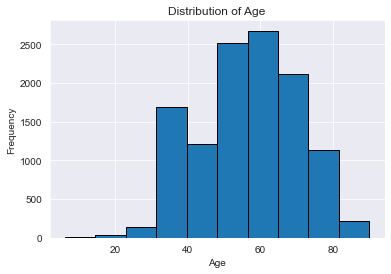

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create distribution plot
plt.hist(df.Age, bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Show plot
plt.show()


In [23]:
df.Age.min()

6.1

In [24]:
df.Age.max()

90.0

In [25]:
import pandas as pd

data = df.loc[: ,['Age' , 'complication']]
# Define intervals
intervals = {
    'Interval 1': (6, 22),
    'Interval 2': (23, 39),
    'Interval 3': (40, 56),
    'Interval 4': (57, 73),
    'Interval 5': (74, 90)
}
df_1 = pd.DataFrame(data)
# Count patients with complications in each interval
complication_counts = {}

for interval, (start, end) in intervals.items():
    patients_in_interval = df_1[(df_1['Age'] >= start) & (df_1['Age'] <= end)]
    complication_counts[interval] = patients_in_interval[patients_in_interval['complication'] == 'Yes'].shape[0]

for interval, count in complication_counts.items():
    print(f"Patients with complications in {interval}: {count}")


Patients with complications in Interval 1: 42
Patients with complications in Interval 2: 313
Patients with complications in Interval 3: 992
Patients with complications in Interval 4: 1515
Patients with complications in Interval 5: 665


* It's possible that individuals aged between 57 to 73 years have a higher risk of experiencing complications.

### Converting Object Data type to numeric

In [26]:
df.dtypes[df.dtypes == 'object']

baseline_cancer       object
baseline_cvd          object
baseline_dementia     object
baseline_diabetes     object
baseline_digestive    object
baseline_osteoart     object
baseline_psych        object
baseline_pulmonary    object
dow                   object
gender                object
month                 object
moonphase             object
mort30                object
complication          object
dtype: object

In [27]:
df.complication.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.baseline_cancer.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.complication.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.baseline_cvd.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.baseline_dementia.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.baseline_diabetes.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.baseline_digestive.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.baseline_osteoart.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.baseline_osteoart.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.baseline_pulmonary.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.gender.replace({"Male" : 1 , "Female" : 0} , inplace = True)
df.baseline_psych.replace({"Yes" :1 ,  "No" : 0} , inplace = True)
df.dow.replace({"Monday" :0 , "Tuesday": 1 , "Wednesday" : 2 , "Thursday" : 3,  "Friday" : 4} , inplace = True)
df.month.replace({"January" : 0 ,  "February" : 1, "March" : 2, "April" : 3,  "May" : 4, "June" : 5 ,"July" : 6,"August" : 7,"September": 8 , "October" : 9 , "November" : 10, "December" : 11} , inplace = True)
df.moonphase.replace({"New Moon" : 0 ,  "First Quarter" : 1 ,"Full moon" :2 , "Third Quarter" :3} , inplace = True)
df.mort30.replace({"Yes" :1 ,  "No" : 0} , inplace = True)

* The replace function is used to convert non-numeric data to numeric since there some variable which are ordinal

In [28]:
df.dtypes[df.dtypes == 'object']

Series([], dtype: object)

### Feature Selection
* Feature selection is the process of choosing the most relevant features (or variables) from a dataset to improve model performance and efficiency. 
* It involves identifying and keeping the features that contribute the most to predicting the target variable while discarding redundant or irrelevant ones, thus simplifying the model and reducing overfitting.

In [59]:
# Using Random Forest classifier
feat_imp = pd.DataFrame()
feat_imp['Features'] = df.iloc[: , 0: -1].columns
feat_imp['Score']      = rf.feature_importances_
feat_imp = feat_imp.sort_values('Score' ,    ascending=False)
feat_imp.Score[0:10].sum()
l1 = list(feat_imp.Features[0:10])
Final_Variables = l1.append('complication')

* The random forest classifier is employed to select important features.
* Initially, the model is constructed using all the available data. Surprisingly, there isn't much of a difference in the model's performance when using all 24 features compared to using only 8 features.

In [60]:
feat_imp.Score[0:8].sum()

0.9546409868512122

* Approximately 95% of the variation in the target variable can be accounted for by 8 out of the 24 features.

In [61]:
# Significant variables
list(feat_imp.Features[0:8])    

['Age',
 'complication_rsi',
 'ccsComplicationRate',
 'ccsMort30Rate',
 'bmi',
 'mortality_rsi',
 'ahrq_ccs',
 'asa_status']

In [62]:
df1 = df

In [63]:
df = df1.loc[: , l1]
df.shape

(11733, 11)

## Sampling

In [64]:
from sklearn.model_selection import train_test_split
df_train , df_test = train_test_split(df , test_size=0.2 , random_state=42)

In [65]:
df_train.complication.value_counts()

complication
0    6416
1    2970
Name: count, dtype: int64

In [66]:
df_os = df_train[df_train.complication == 1]     
df_os.shape

(2970, 11)

In [67]:
df_train1 = pd.concat([df_train , df_os])    # Oversampling

* From the exploratory data analysis (EDA), it's evident that there is a class imbalance in the dataset. 
* Specifically, the class representing patients suffering from post-surgical complications (Class 1) is observed to be underrepresented. 
* To address this, oversampling is carried out for Class 1, wherein duplicate records of Class 1 instances are added to the training data.

In [68]:
df_train1.complication.value_counts()

complication
0    6416
1    5940
Name: count, dtype: int64

In [69]:
df_train = df_train1

In [70]:
df_train_x = df_train.iloc[: , 0:-1]
df_train_y = df_train.iloc[: , -1]
df_test_x = df_test.iloc[: , 0:-1]
df_test_y = df_test.iloc[: , -1]

In [71]:
print(df.shape , df_train_x.shape , df_train_y.shape , df_test_x.shape , df_test_y.shape)

(11733, 11) (12356, 10) (12356,) (2347, 10) (2347,)


### Scaling the X variables
* As there are different feature variables in X, it can have a possibility of giving more importance to the variables having greater range and give less important to variables having small range which is not suitable.
* So to overcome this problem scaling is done on the all variables in X, as it will bring all the variables in a same range.

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train_x = sc.fit_transform(df_train_x)
df_test_x = sc.transform(df_test_x)

## Model Building

## Logistics Regression

In [73]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(df_train_x , df_train_y)

LogisticRegression(class_weight='balanced')

In [74]:
# Prediction on train data set
pred_logreg_train= logreg.predict(df_train_x)

In [75]:
Acc_tr  = accuracy_score(df_train_y , pred_logreg_train)
recall_tr    = recall_score(df_train_y , pred_logreg_train)
precision_tr = precision_score(df_train_y , pred_logreg_train)
f1_ratio_tr  = f1_score(df_train_y , pred_logreg_train)

In [76]:
print("Accuracy     = " , Acc_tr , "\nRecall_score = " , recall_tr ,"\nPrecision    = " , precision_tr , "\nF1_ratio     = " , f1_ratio_tr)

Accuracy     =  0.699336354807381 
Recall_score =  0.6599326599326599 
Precision    =  0.6981300089047195 
F1_ratio     =  0.6784941583729986


* The logistic regression model shows no signs of overfitting on the training data.
* To verify this, the model's performance is checked on the same training data to make sure it's not just memorizing the examples it has seen before.

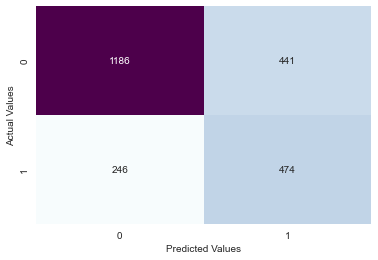

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1627
           1       0.52      0.66      0.58       720

    accuracy                           0.71      2347
   macro avg       0.67      0.69      0.68      2347
weighted avg       0.73      0.71      0.72      2347

Accuracy of the model:  0.7072858968896464


In [77]:
# Prediction on train data set
pred_logreg_test= logreg.predict(df_test_x)
cfm=confusion_matrix(df_test_y,pred_logreg_test)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(df_test_y,pred_logreg_test))

acc=accuracy_score(df_test_y,pred_logreg_test)
print("Accuracy of the model: ",acc)

In [78]:
# Append metrics to the DataFrame
performance_metrics = pd.DataFrame()
performance_metrics = performance_metrics._append({"Model": "Logistic Regression", "Accuracy": accuracy_score(df_test_y , pred_logreg_test),  "Recall":recall_score(df_test_y , pred_logreg_test) ,"Precision": precision_score(df_test_y , pred_logreg_test), "F1 Score": f1_score(df_test_y , pred_logreg_test)}, ignore_index=True)

In [79]:
performance_metrics

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.707286,0.658333,0.518033,0.579817


## Decision Tree

In [80]:
dt = DecisionTreeClassifier(class_weight='balanced')
# Hyperparameter tunning
search_dict = {"criterion" : ["gini" ,"entropy"] ,
              "max_depth" : range(5 ,9) , 
             "min_samples_split" : range(50 , 100 , 150 ) }
dt_search = GridSearchCV(dt , param_grid= search_dict)
dt_search.fit(df_train_x , df_train_y )

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 9),
                         'min_samples_split': range(50, 100, 150)})

In [81]:
dt_search.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 50}

In [82]:
# Prediction on train data set
pred_dt_train= dt_search.predict(df_train_x)

In [83]:
Acc_tr  = accuracy_score(df_train_y , pred_dt_train)
recall_tr    = recall_score(df_train_y , pred_dt_train)
precision_tr = precision_score(df_train_y , pred_dt_train)
f1_ratio_tr  = f1_score(df_train_y , pred_dt_train)


In [84]:
print("Accuracy     = " , Acc_tr , "\nRecall_score = " , recall_tr , "\nPrecision    = " , precision_tr , "\nF1_ratio     = " , f1_ratio_tr)

Accuracy     =  0.8346552282292004 
Recall_score =  0.7383838383838384 
Precision    =  0.8996923076923077 
F1_ratio     =  0.8110957004160887


* The decision tree model shows no signs of overfitting on the training data.

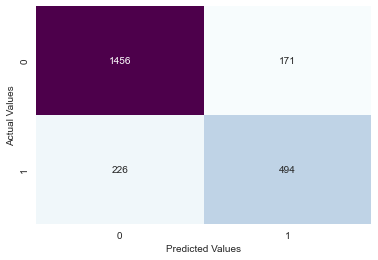

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1627
           1       0.74      0.69      0.71       720

    accuracy                           0.83      2347
   macro avg       0.80      0.79      0.80      2347
weighted avg       0.83      0.83      0.83      2347

Accuracy of the model:  0.8308478909245846


In [85]:
# Prediction on test data set
pred_dt_test= dt_search.predict(df_test_x)
cfm=confusion_matrix(df_test_y,pred_dt_test)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(df_test_y,pred_dt_test))

acc=accuracy_score(df_test_y,pred_dt_test)
print("Accuracy of the model: ",acc)

In [86]:
# Append metrics to the DataFrame
performance_metrics = performance_metrics._append({"Model": "Decision tree",  "Accuracy": accuracy_score(df_test_y , pred_dt_test),  "Recall":recall_score(df_test_y , pred_dt_test) ,"Precision": precision_score(df_test_y , pred_dt_test), "F1 Score": f1_score(df_test_y , pred_dt_test)}, ignore_index=True)

In [87]:
performance_metrics

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.707286,0.658333,0.518033,0.579817
1,Decision tree,0.830848,0.686111,0.742857,0.713357


## Random Forest

In [88]:
rf = RandomForestClassifier(criterion='gini',
                             n_estimators=100,
                             max_depth=6,
                             min_samples_split=100,
                             min_samples_leaf=100,
                           class_weight='balanced')
rf.fit(df_train_x , df_train_y)

RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_leaf=100, min_samples_split=100)

In [89]:
# Prediction on train data set
pred_rf_train= rf.predict(df_train_x)

In [90]:
Acc_tr  = accuracy_score(df_train_y , pred_rf_train)
recall_tr    = recall_score(df_train_y , pred_rf_train)
precision_tr = precision_score(df_train_y , pred_rf_train)
f1_ratio_tr  = f1_score(df_train_y , pred_rf_train)

In [91]:
print("Accuracy     = " , Acc_tr , "\nRecall_score = " , recall_tr ,"\nPrecision    = " , precision_tr , "\nF1_ratio     = " , f1_ratio_tr)

Accuracy     =  0.764567821301392 
Recall_score =  0.7131313131313132 
Precision    =  0.7785333578386326 
F1_ratio     =  0.7443985590018452


* The random forest model shows no signs of overfitting on the training data.

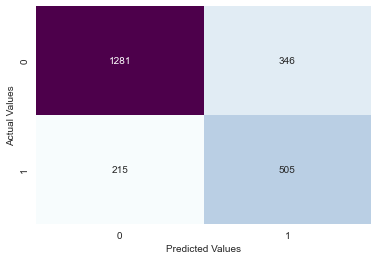

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1627
           1       0.59      0.70      0.64       720

    accuracy                           0.76      2347
   macro avg       0.72      0.74      0.73      2347
weighted avg       0.78      0.76      0.77      2347

Accuracy of the model:  0.7609714529186196


In [92]:
# prediction on test
pred_rf_test = rf.predict(df_test_x)
cfm=confusion_matrix(df_test_y,pred_rf_test)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(df_test_y,pred_rf_test))

acc=accuracy_score(df_test_y,pred_rf_test)
print("Accuracy of the model: ",acc)

In [93]:
# Append metrics to the DataFrame
performance_metrics = performance_metrics._append({"Model": "Random Forest",  "Accuracy": accuracy_score(df_test_y , pred_rf_test),  "Recall":recall_score(df_test_y , pred_rf_test) ,"Precision": precision_score(df_test_y , pred_rf_test), "F1 Score": f1_score(df_test_y , pred_rf_test)}, ignore_index=True)
performance_metrics

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.707286,0.658333,0.518033,0.579817
1,Decision tree,0.830848,0.686111,0.742857,0.713357
2,Random Forest,0.760971,0.701389,0.593420,0.642903


## Conclusion

1.	Decision tree model performs better compared to random forest and logistic regression. Since F1 score for decision tree is 71.3%
2.	According to exploratory data analysis, people age between 57 to 73 have highest risk of postsurgical complications.
3.	The main factor affecting postsurgical complication is age, followed by complication risk index, complication rate and so forth.


## Scope
Post Surgical Complications Prediction project can have several benefits and considerations:

Improved Patient Outcomes: Predicting post-surgical complications can lead to better patient outcomes by enabling early intervention and personalized care, reducing complications, and potentially saving lives.

Cost Reduction: Hospitals and healthcare providers can save significant costs by preventing complications that require additional treatments or readmissions. Fewer complications mean lower healthcare expenses.

Enhanced Reputation: Healthcare institutions that successfully implement such predictive projects can gain a reputation for providing high-quality care and being proactive in patient safety.